In [114]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
import json
import numpy as np
rc('text', usetex=True)

#sns.set_style("white", {"font": "serif"})
sns.set(font_scale=1.4)
sns.set_style('white', {'font.family':'Times New Roman', 'font.serif':'Times New Roman'})

ABAU_41_DATA = {
    #"English transformer": {"unigram": 0.6372982263565063, "bigram": 0.23959693312644958, "outedge": 0.6726287603378296, "ignore": 0.7676309943199158, "add_interp": 0.23583826422691345, "mul_interp": 0.23476055264472961, "copycat": 0.22520437836647034},
    #"English GRU": {"unigram": 0.7767780423164368, "bigram": 0.6356952786445618, "outedge": 0.7854129672050476, "ignore": 0.8393816351890564, "add_interp": 0.6266373991966248, "mul_interp": 0.583559513092041, "copycat": 0.5187951922416687},
    "English GRU": {'unigram': 0.6387753486633301, 'bigram': 0.611878514289856, 'outedge': 0.6651336550712585, 'ignore': 0.6889258027076721, 'add_interp': 0.5392294526100159, 'mul_interp': 0.5381485819816589, 'copycat': 0.36994701623916626},
    "Finnish GRU": {"unigram": 0.5438895225524902, "bigram": 0.6961760520935059, "outedge": 0.4991966187953949, "ignore": 0.5026070475578308, "add_interp": 0.48344558477401733, "mul_interp": 0.4225654900074005, "copycat": 0.2934763431549072},
    "Chinese GRU": {"unigram": 0.48498988151550293, "bigram": 0.7463394999504089, "outedge": 0.4362708032131195, "ignore": 0.4593313932418823, "add_interp": 0.41904568672180176, "mul_interp": 0.384884238243103, "copycat": 0.299516886472702},
    
    'Chinese transformer': {'unigram': 0.5229887962341309, 'bigram': 0.7513302564620972, 'outedge': 0.5828443765640259, 'ignore': 0.6300477385520935, 'add_interp': 0.5532901883125305, 'mul_interp': 0.5365908741950989, 'copycat': 0.508683979511261},
    'English transformer': {'unigram': 0.6500980854034424, 'bigram': 0.5090360641479492, 'outedge': 0.715187132358551, 'ignore': 0.7869880795478821, 'add_interp': 0.4787653684616089, 'mul_interp': 0.4868844151496887, 'copycat': 0.4102855324745178},
    'Finnish transformer': {'unigram': 0.6155282258987427, 'bigram': 0.6622210741043091, 'outedge': 0.6666368246078491, 'ignore': 0.7326148152351379, 'add_interp': 0.5568457245826721, 'mul_interp': 0.5427842736244202, 'copycat': 0.5118857622146606},
}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
with open("lstm.json") as reader:
    lstm_data = json.load(reader)
    
with open("transformer.json") as reader:
    transformer_data = json.load(reader)
    
with open("gru.json") as reader:
    gru_data = json.load(reader)
    
with open("grunoise_experiment.json") as reader:
    new_gru_data = []
    for doc in gru_data:
        new_doc = []
        for result in doc:
            if "state_dropout" not in result:
                new_doc.append(result)
            else:
                print("skipping", result)
        if len(new_doc) > 0:
            new_gru_data.append(new_doc)
    new_gru_data += json.load(reader)
    gru_data = new_gru_data
    
noises = ["symbol_swap", "symbol_mask", "symbol_dropout", "state_reset", "state_skip", "state_noise", "state_dropout"]

def fix_hyp_names(result, language, both_interp=True):
    pretty_names = {
        "copycat": "Random\nRestart",
        "ngram(2)": "Lexical\nContext",
        "ngram(1)": "Unigram",
        "skip": "Ignore",
        "mean_dist_state": "Syntactic\nContext",
        "interp_add": "Interp.\n(add.)",
        "interp_mul": "Interp.\n(mul.)"
    }
    new_result = dict(**result)
    new_result["hypothesis"] = pretty_names[result["hypothesis"]]
    new_result["language"] = language
    return new_result

def fix_abau_hyp_name(name, both_interp=False):
    return {
        "unigram": "Unigram",
        "bigram": "Lexical\nContext",
        "outedge": "Syntactic\nContext",
        "ignore": "Ignore",
        "add_interp": "Interp.\n(add.)",
        "mul_interp": "Interp.\n(mul.)",
        "copycat": "Random\nRestart"
    }[name]

def fix_abau_noise_type(name):
    return {
        "subst": "symbol_swap",
        "state": "state_dropout"
    }[name]

skipping {'n_states': 8, 'n_symbols': 128, 'n_neighbors': 65, 'hypothesis': 'copycat', 'interp_acc': 0.0, 'extrap_acc': 0.1566353703662753, 'state_dropout': 0.0}
skipping {'n_states': 8, 'n_symbols': 128, 'n_neighbors': 65, 'hypothesis': 'gt', 'interp_acc': 0.0, 'extrap_acc': 0.3406636057794094, 'state_dropout': 0.0}
skipping {'n_states': 8, 'n_symbols': 128, 'n_neighbors': 65, 'hypothesis': 'ngram(2)', 'interp_acc': 0.0, 'extrap_acc': 0.23993677259042517, 'state_dropout': 0.0}
skipping {'n_states': 8, 'n_symbols': 128, 'n_neighbors': 65, 'hypothesis': 'ngram(1)', 'interp_acc': 0.0, 'extrap_acc': 0.516666795674722, 'state_dropout': 0.0}
skipping {'n_states': 8, 'n_symbols': 128, 'n_neighbors': 65, 'hypothesis': 'skip', 'interp_acc': 0.0, 'extrap_acc': 0.5376711211473753, 'state_dropout': 0.0}
skipping {'n_states': 8, 'n_symbols': 128, 'n_neighbors': 65, 'hypothesis': 'mean_dist_state', 'interp_acc': 0.0, 'extrap_acc': 0.3070084446583894, 'state_dropout': 0.0}
skipping {'n_states': 8, '

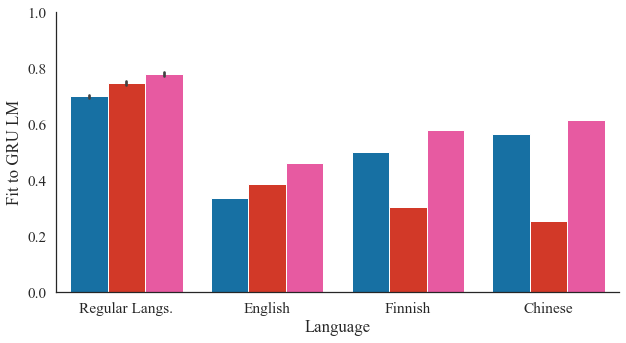

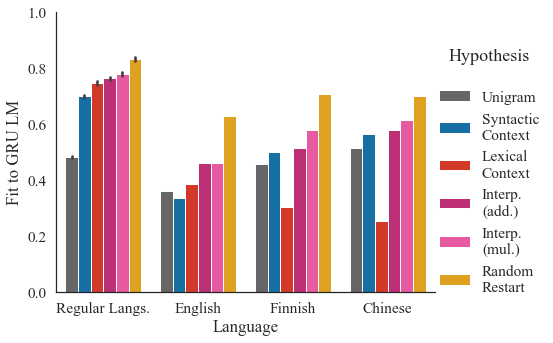

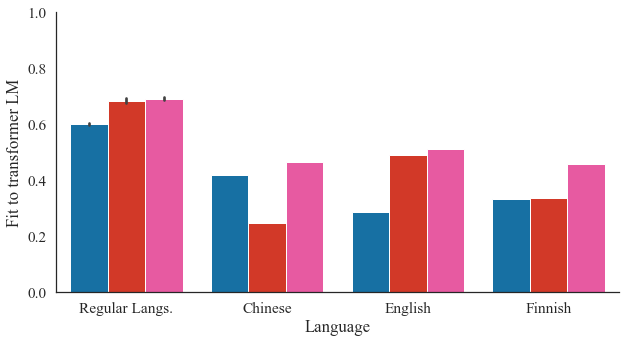

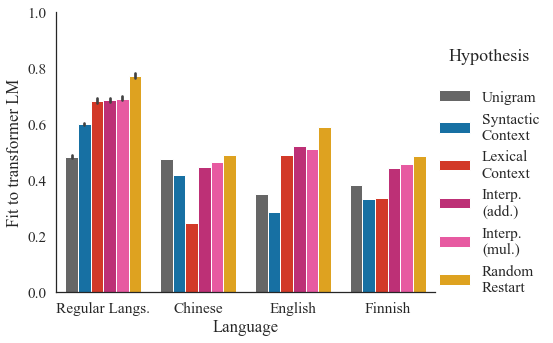

In [96]:
for model, data in [("GRU", gru_data), ("transformer", transformer_data)]:
    noise_free = []
    for result_group in data:
        noise_type, = (n for n in noises if n in result_group[0])
        for result in result_group:
            if result["hypothesis"] in ("gt", "skip"):
                continue
            if result[noise_type] == 0:
                noise_free.append(fix_hyp_names(result, "Regular Langs.", both_interp=False))
                
    
    for name, experiments in ABAU_41_DATA.items():
        lang, abau_model = name.split()
        if abau_model != model:
            continue
        for hypothesis, result in experiments.items():
            #print(fix_abau_hyp_name(hypothesis))
            noise_free.append({
                "language": lang,
                "extrap_acc": result,
                "hypothesis": fix_abau_hyp_name(hypothesis),
            })
    
    df = pd.DataFrame(noise_free)
    df["real_extrap_acc"] = 1 - df["extrap_acc"]
    g = sns.catplot(
        data=df,
        x="language",
        y="real_extrap_acc",
        hue="hypothesis",
        hue_order=["Syntactic\nContext", "Lexical\nContext", "Interp.\n(mul.)"],
        aspect=1.8,
        kind="bar",
        legend=False,
        palette={"Syntactic\nContext": "#0076ba", "Lexical\nContext": "#ee220c", "Interp.\n(mul.)": "#ff42a1"},
        #whis=100,
    )
    #display(df.query("language == 'Finnish'"))
    #g._legend.set_title("Generalization\nModel")
    #fig, ax = plt.subplots()
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.ylim(0, 1)
    #plt.yticks(np.arange(0.65, 0.90, 0.05))
    plt.xlabel("Language")
    plt.ylabel(f"Fit to {model} LM")
    #plt.clabel(f"Generalization Model")
    plt.savefig(f"{model.lower()}_teaser.pdf")
    
    
    g = sns.catplot(
        data=df,
        x="language",
        y="real_extrap_acc",
        hue="hypothesis",
        hue_order=["Unigram", "Syntactic\nContext", "Lexical\nContext", "Interp.\n(add.)", "Interp.\n(mul.)", "Random\nRestart"],
        aspect=1.3,
        kind="bar",
        legend=True,
        palette={
            "Unigram": "#666666",
            "Syntactic\nContext": "#0076ba",
            "Lexical\nContext": "#ee220c",
            "Interp.\n(add.)": "#d41876",
            "Interp.\n(mul.)": "#ff42a1",
            "Random\nRestart": "#feae00",
        },
    )
    plt.setp(g._legend.get_title(), fontsize=18)
    g._legend.set_title("Hypothesis\n")
    plt.ylim(0, 1)
    plt.xlabel("Language")
    plt.ylabel(f"Fit to {model} LM")
    plt.savefig(f"{model.lower()}_base.pdf")

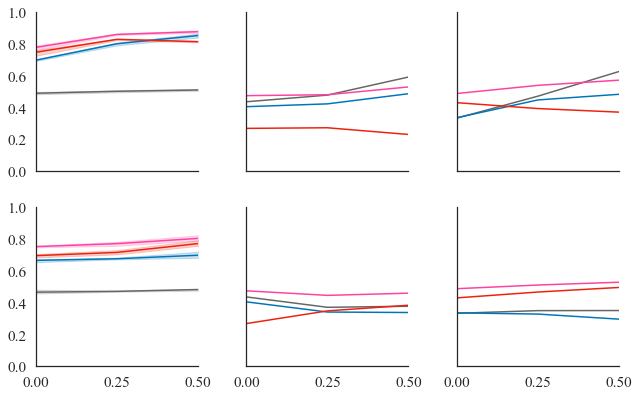

In [103]:
for model, data in [("gru", gru_data)]:
    clean = []
    for result_group in data:
        noise_type, = (n for n in noises if n in result_group[0])
        for result in result_group:
            if result["hypothesis"] in ("gt", "skip"):
                continue
            clean.append(fix_hyp_names(result, language="Regular Langs."))
            
    assert model == "gru"
    
    noise_strength = [0, 0.25, 0.5, 0.75]
    with open("/lingo/abau/language-models/bpe-noise-grid-data.json") as reader:
        abau_data = json.load(reader)
        for experiment_name, experiment_data in abau_data.items():
            lang, noise_type = experiment_name.split("-")
            for hyp, values in experiment_data.items():
                for i, result in enumerate(values):
                    clean.append({
                        "language": lang.capitalize(),
                        "hypothesis": fix_abau_hyp_name(hyp),
                        "extrap_acc": result,
                        fix_abau_noise_type(noise_type): noise_strength[i],
                    })
                    
    for datum in clean:
        if "symbol_swap" in datum:
            datum["noise_type"] = "symbol_swap"
            datum["noise_value"] = datum["symbol_swap"]
        elif "state_dropout" in datum:
            datum["noise_type"] = "state_dropout"
            datum["noise_value"] = datum["state_dropout"]
            
    all_cols = ["n_states", "n_symbols", "n_neighbors", "hypothesis", "interp_acc", "extrap_acc", "symbol_swap", "language", "noise_type", "noise_value", "extrap_weight_ngram", "extrap_weight_out", "symbol_mask", "symbol_dropout", "state_reset", "state_skip", "state_noise", "state_dropout", "real_extrap_acc"]
    keep_cols = ["extrap_acc", "noise_type", "noise_value", "language", "hypothesis"]
    for datum in clean:
        for col in all_cols:
            if col in datum and col not in keep_cols:
                del datum[col]
                 
    df = pd.DataFrame(clean)
    df["real_extrap_acc"] = 1 - df["extrap_acc"]
    df = df.query("noise_type == 'symbol_swap' | noise_type == 'state_dropout'")
    #df = df.query("language == 'English'")
    
    #display(df.query("language == 'Finnish'"))
    
    grid = sns.FacetGrid(df, row="noise_type", col="language", margin_titles=False)
    grid.map_dataframe(
        sns.lineplot,
        x="noise_value",
        y="real_extrap_acc",
        hue="hypothesis",
        hue_order=["Unigram", "Syntactic\nContext", "Lexical\nContext", "Interp.\n(mul.)"],
        palette={
            "Unigram": "#666666",
            "Syntactic\nContext": "#0076ba",
            "Lexical\nContext": "#ee220c",
            "Interp.\n(add.)": "#d41876",
            "Interp.\n(mul.)": "#ff42a1",
            "Random\nRestart": "#feae00",
        },
        #aspect=1.5,
        #kind="line",
    )
    #grid.set_titles(col_template="{col_name}", row_template="{row_name}")
    grid.set_titles("")
    grid.set(xlim=(0, .5), ylim=(0, 1), xticks=[0, 0.25, 0.5], yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
    grid.fig.subplots_adjust(wspace=0.3)
    plt.savefig(f"{model}_noise_grid.pdf")
    
    #sns.relplot(data=df, x="noise_value", y="real_extrap_acc", kind="line")

    #plt.xlabel(f"Noise strength ({noise_type})")
    #plt.ylabel(f"({model}) Model Error")
    #plt.savefig(f"{model}_{noise_type}.pdf")

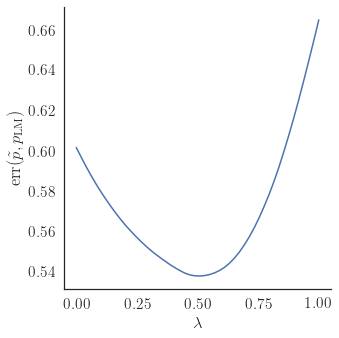

In [124]:
interp_ys = [
 0.6018456220626831,
 0.5970312356948853,
 0.592349648475647,
 0.5879195928573608,
 0.5837442874908447,
 0.5798145532608032,
 0.5761176347732544,
 0.572596549987793,
 0.569291353225708,
 0.5661131739616394,
 0.5631415247917175,
 0.5604475736618042,
 0.5578622221946716,
 0.5554110407829285,
 0.5531212091445923,
 0.5509652495384216,
 0.5489981770515442,
 0.5471689105033875,
 0.5454025268554688,
 0.5436927676200867,
 0.5421533584594727,
 0.5407543778419495,
 0.5395104289054871,
 0.5386592149734497,
 0.5382264852523804,
 0.5381485819816589,
 0.5383684039115906,
 0.5388984084129333,
 0.5397411584854126,
 0.5409273505210876,
 0.5425193905830383,
 0.5445702075958252,
 0.5471201539039612,
 0.5501631498336792,
 0.5537076592445374,
 0.5577157735824585,
 0.5622584819793701,
 0.5673052668571472,
 0.5728585124015808,
 0.5788741707801819,
 0.5853791832923889,
 0.5925194621086121,
 0.6002404689788818,
 0.6084297895431519,
 0.616963803768158,
 0.625968337059021,
 0.6353785991668701,
 0.6450864672660828,
 0.654979944229126,
 0.6651334166526794
]

interp_xs = np.linspace(0, 1, 50)

data = pd.DataFrame({"$\\lambda$": x, "$\\textrm{err}(\\tilde{p}, p_{\\mathrm{LM}})$": y} for x, y in zip(interp_xs, interp_ys))

sns.relplot(data=data, x="$\\lambda$", y="$\\textrm{err}(\\tilde{p}, p_{\\mathrm{LM}})$", kind="line")

plt.savefig("interp_curve.pdf")